In [38]:
import AircraftRequirements as req
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

Reference Aircraft Analysis

In [39]:
# import reference aircraft databse
df_aircraft = pd.read_csv("referenceAircraft.csv")
df_aircraft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Manufacturer                               15 non-null     object 
 1   Aircraft name                              15 non-null     object 
 2   # Passengers                               15 non-null     int64  
 3   Maximum payload [kg]                       14 non-null     float64
 4   Range [km]                                 15 non-null     int64  
 5   Maximum take-off mass [kg]                 15 non-null     int64  
 6   Empty mass (or Operating Empty Mass) [kg]  15 non-null     int64  
 7   Wing Area [m2]                             13 non-null     float64
 8   Wing span [m]                              15 non-null     float64
 9   Aspect ratio                               13 non-null     float64
 10  OEM/MTOM                    

Class I Weight Estimation

MTOM estimation

In [16]:
# remove data points with missing values for MP and MTOM 
df_cleaned = df_aircraft[['Maximum take-off mass [kg]', 'Maximum payload [kg]']].dropna()

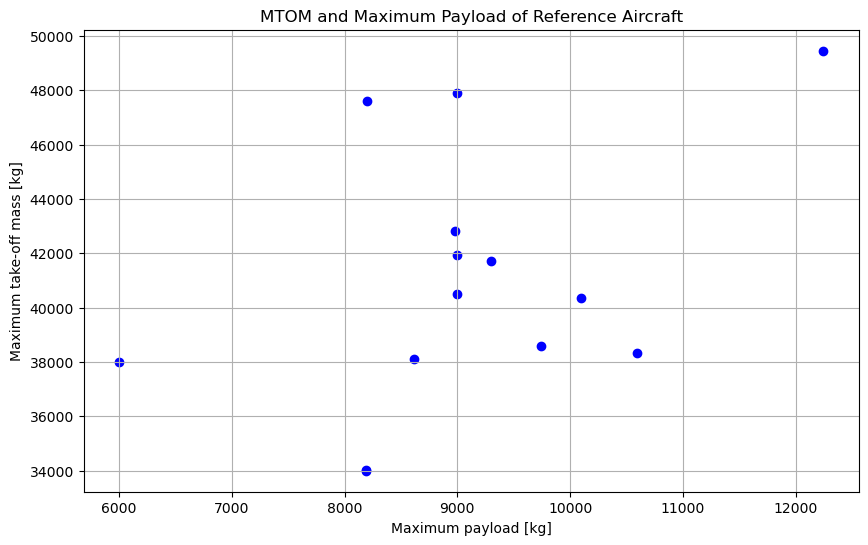

In [17]:
# plot a scatter
plt.figure(figsize=(10,6))
plt.scatter(df_cleaned['Maximum payload [kg]'], df_cleaned['Maximum take-off mass [kg]'], c='blue')
plt.xlabel('Maximum payload [kg]')
plt.ylabel('Maximum take-off mass [kg]')
plt.title('MTOM and Maximum Payload of Reference Aircraft')
plt.grid(True)
plt.show()

In [18]:
# Linear Regression
mp = df_cleaned['Maximum payload [kg]']
mtom = df_cleaned['Maximum take-off mass [kg]']
slope, intercept, r_value, p_value, std_err = stats.linregress(mp, mtom)

print(f'Slope: {slope:.2f}')
print(f'Intercept: {intercept:.1f}')
print(f'R-squared: {r_value**2:.2f}')

Slope: 1.43
Intercept: 27951.4
R-squared: 0.18


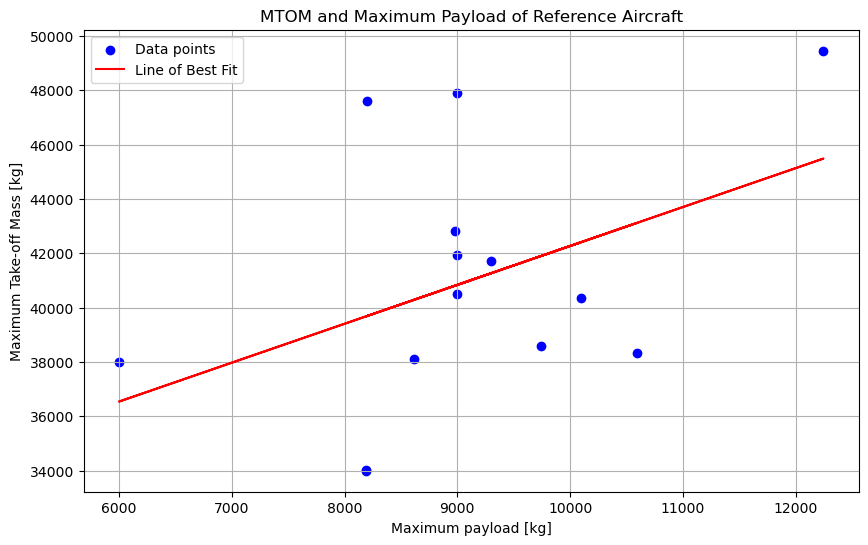

In [19]:
# plot and save
plt.figure(figsize=(10, 6))
plt.scatter(mp, mtom, color='blue', label='Data points')
plt.plot(mp, slope * mp + intercept, color='red', label='Line of Best Fit')
plt.xlabel('Maximum payload [kg]')
plt.ylabel('Maximum Take-off Mass [kg]')
plt.title('MTOM and Maximum Payload of Reference Aircraft')
plt.legend()
plt.grid(True)
plt.savefig('MTOMestimation.png', format='png')
plt.show()


OEM Estimation

In [40]:
# isolate the OEM fraction
df_OEMfrac = df_aircraft[['OEM/MTOM']].dropna()

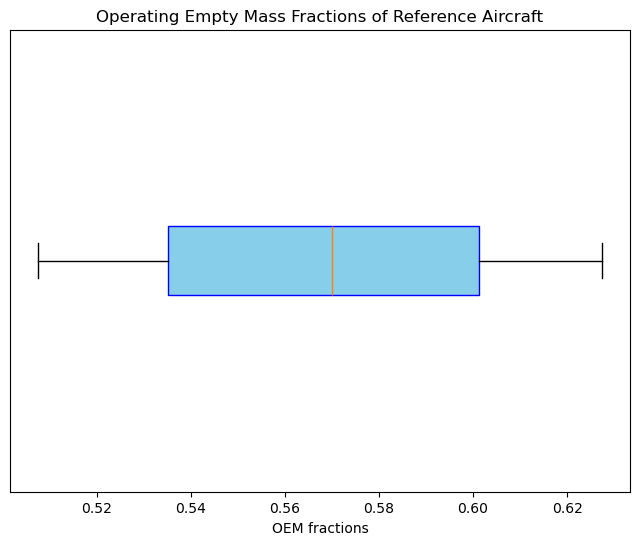

In [41]:
# Plot a boxplot to ilustrate the distribution of Operating Empty Mass Fractions of the reference aircrafts
plt.figure(figsize=(8, 6))
plt.boxplot(df_OEMfrac, vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'))
plt.title('Operating Empty Mass Fractions of Reference Aircraft')
plt.xlabel('OEM fractions')
plt.yticks([])
plt.savefig('OEMfraction.png', format='png')
plt.show()

In [42]:
# Get descriptive statistics about the OEM fraction population
df_OEMfrac.describe()

,OEM/MTOM
count,15.000000
mean,0.568039
std,0.041035
min,0.507583
25%,0.535136
50%,0.569934
75%,0.601200
max,0.627349
